In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.linalg as LA
import random as rng

In [ ]:
def q(a, b, c, x):
    return a * (x ** 2) + b * x + c

quadratic function to demonstrate plotting with functions

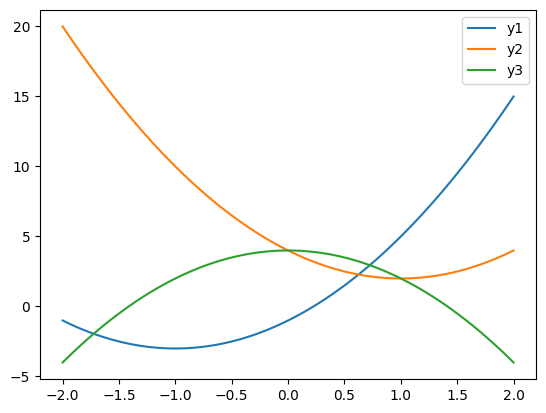

In [ ]:
x = np.linspace(-2, 2, 100)

plt.plot(x, q(2, 4, -1, x))
plt.plot(x, q(2, -4, 4, x))
plt.plot(x, q(-2, 0, 4, x))

plt.legend(['y1', 'y2', 'y3'])

plt.show()

plotting different quadratic functions

In [ ]:
def opt_reps(X, k, assign):
    # required is array of vectors, k clusters, centroids (random for first run)
    (n, d) = X.shape
    reps = np.zeros((k, d))
    # for each cluster check if vectors are close, assign vectors to clusters
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    # creating new centroids based on clusters
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

*   opt_reps - find the new centroids
*   opt_cluster - make the new clusters, run this first with random centroids

In [ ]:
def kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = np.random.randint(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    # assigning random clusters, then refines through the functions
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
    return assign

def kmeans2(X, k, maxiter=20):
    (n, d) = X.shape
    #assign = np.zeros(d,dtype=int)
    reps = np.random.uniform(np.min(X),np.max(X),(k,X.shape[1]))
    for iter in range(maxiter):
        # The following steps are the same as kmeans(), just flipped.

        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)

    return assign

Performs the clustering algorithm and calculates the closest clusters for each vector

In [ ]:
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],
              [-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])
assign = kmeans(X, 3)

134.19444444444446
95.0
14.937500000000002
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334
9.083333333333334


Demonstrate the kmeans algorithm working on a set of 8 points, we can see the average distance of vectors to centroids

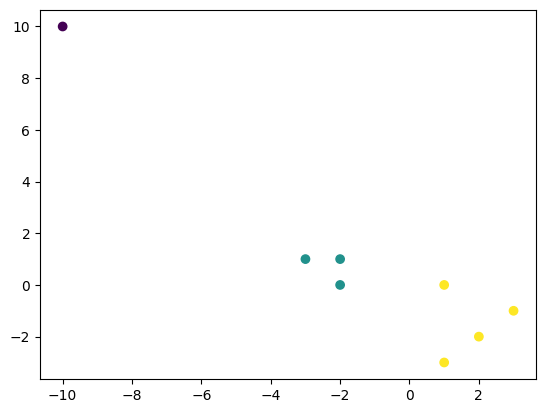

In [ ]:
plt.scatter(X[:,0], X[:,1], c=assign)
plt.show()

plotting the points and coloring them based on cluster to visually show the clusters

In [ ]:
print(opt_reps(X, 3, assign))

[[-10.          10.        ]
 [ -2.33333333   0.66666667]
 [  1.75        -1.5       ]]


printing the centroids

In [ ]:
df = pd.read_csv('penguins-measurements.csv')
df = df.dropna()
X = df[['bill_length_mm', 'bill_depth_mm',
        'flipper_length_mm', 'body_mass_g']].to_numpy()

creating a dataframe based on the penguin measurement data, clearning NA values and making it into a numpy array

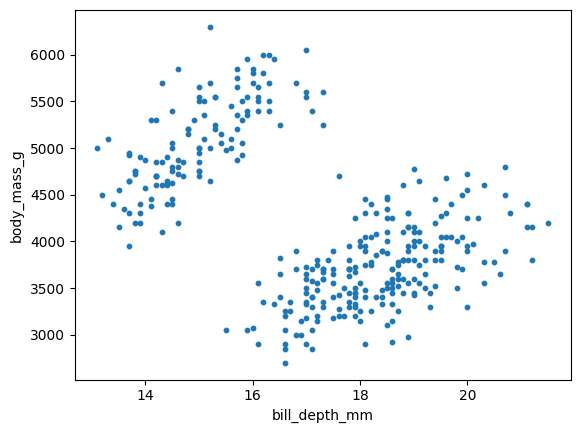

In [ ]:
plt.scatter(X[:,1], X[:,3], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

plotting the data from two columns from the dataframe

In [ ]:
mean = np.mean(X, axis=0)  # Compute mean for each column
std = np.std(X, axis=0)  # Compute standard deviation for each column
X = (X - mean) / std # Standardize each column

standardizing each of the columns for better numbers

In [ ]:
assign = kmeans(X, 2)

1274.5472232114978
586.3693285716884
570.4328840882918
565.821904255223
565.7076453796292
565.7076453796292
565.7076453796292
565.7076453796292
565.7076453796292
565.7076453796292


performing the kmeans clustering algorithm on the data set with assumed 2 clusters

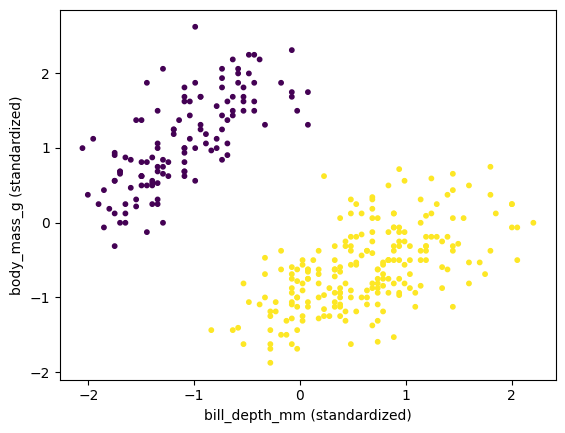

In [ ]:
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

plotting the two clusters from the kmeans algorithm output

In [ ]:
assign = kmeans(X, 3)

1214.1314073195422
573.0649318093562
537.7916016036141
505.84961080016035
500.60563992791094
495.60963775711207
464.5344356638933
399.4103223523009
381.46199244316136
381.11898335864197


doing the kmeans algorithm with assumed 3 clusters for comparison

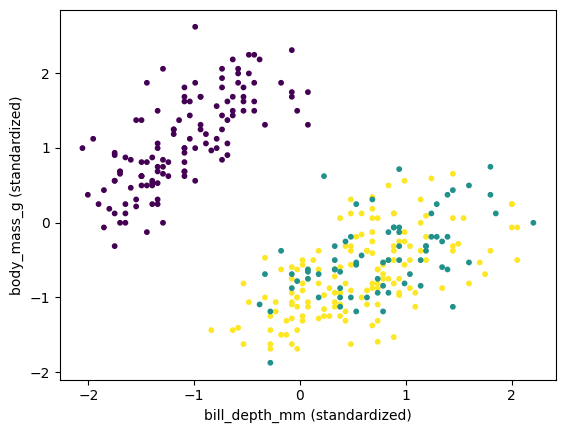

In [ ]:
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

plotting the three clusters

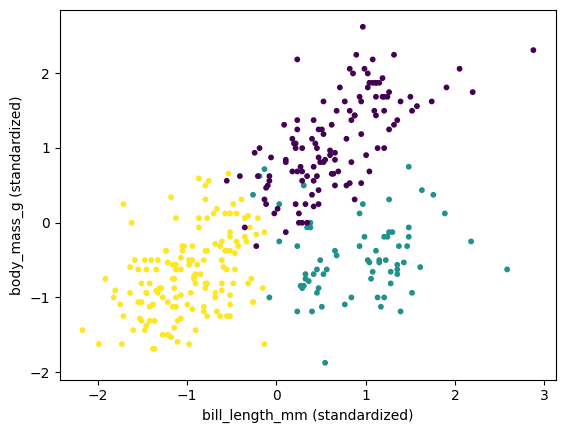

In [ ]:
plt.scatter(X[:,0], X[:,3], c=assign, s=10)
plt.xlabel('bill_length_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

fixing the columns selected while plotting to better show the three clusters

In [ ]:
df_truth = pd.read_csv('penguins-species.csv')
df_truth = df_truth.iloc[df.index]
df_truth.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


creating a penguin species dataframe and indexing it based on the earlier dataframe

In [ ]:
species = df_truth['species']
print(species.unique())

['Adelie' 'Chinstrap' 'Gentoo']


showing what is in the new dataframe

In [ ]:
species2color = {'Adelie': 'b', 'Chinstrap': 'g', 'Gentoo': 'r'}
truth = species.replace(species2color)

assigning the three species (clusters) a color

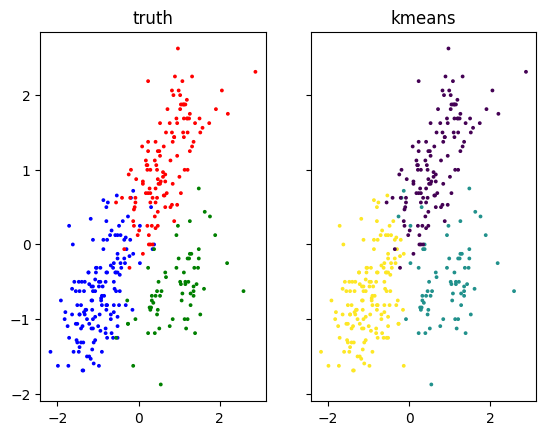

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(X[:,0], X[:,3], c=truth, s=3)
ax1.set_title('truth')
ax2.scatter(X[:,0], X[:,3], c=assign, s=3)
ax2.set_title('kmeans')
plt.show()

demosntrating the use of kmeans and the real species measurements and demonstrating kmeans' effectiveness and correctness

In [ ]:
df_full = pd.concat([df, df_truth], axis=1)
df_full.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


combining the two dataframes

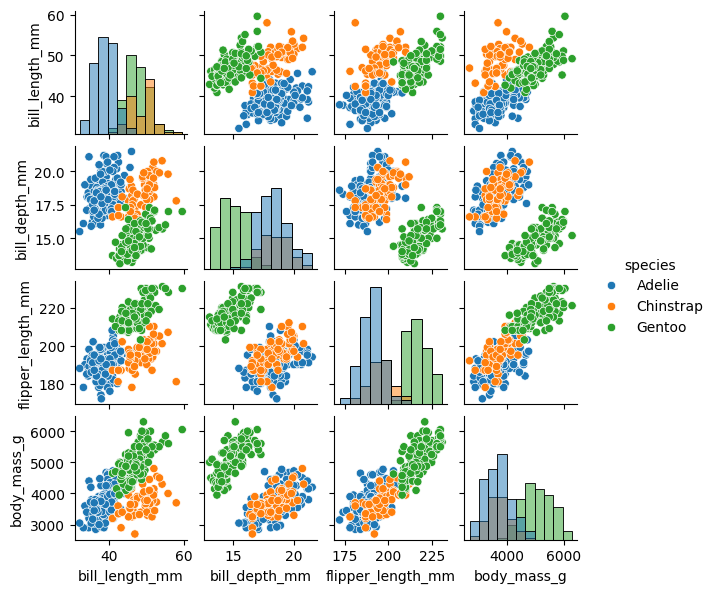

In [ ]:
import seaborn as sns
sns.pairplot(df_full, hue="species", diag_kind="hist", height=1.5)
plt.show()
# plot this again but wiht the simulated data

plotting all columns of the combined dataframes against each other to show us how they the variables compare in the different clusters

2607.830573665578
917.4319242022638
626.0147051701572
464.27053527705857
382.97628092370667
381.17988602788284
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153
381.1108359882153


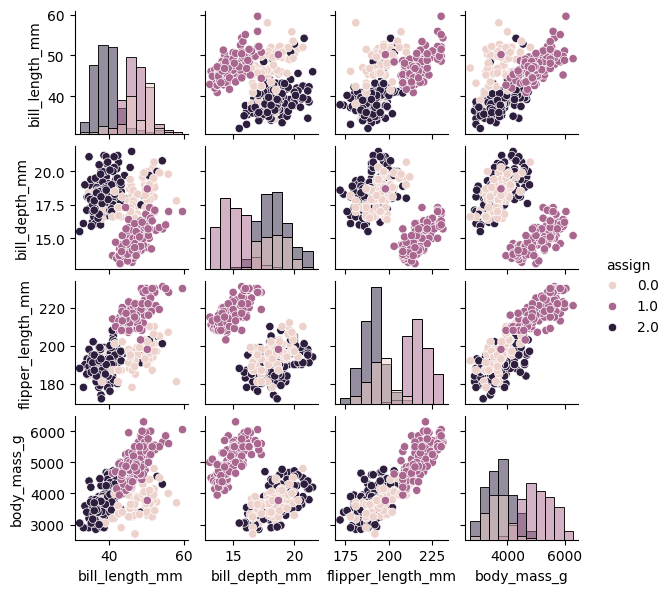

In [ ]:
assign = kmeans2(X, 3)
df_assign = pd.DataFrame(assign, columns=['assign'])
df_full = pd.concat([df, df_assign], axis = 1)
df_full.head()
sns.pairplot(df_full, hue="assign", diag_kind="hist", height=1.5)
plt.show()

the same operation as above but we use the kmeans algorithm here instead of the already correct species dataframe, with similar plots we can further see the effectiveness of the kmeans algorithm in correctly clustering the vectors